<a href="https://colab.research.google.com/github/Maxime-Bakunzi/ALU-Water-Quality-Model-I/blob/main/Water_Quality_Mode_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Water Quality Classification Model

This project builds a classification model to analyze water quality using a neural network in Keras. The dataset is preprocessed and split into training and testing sets, ensuring the features are correctly scaled by **Data Handler**. We implement multiple models with various regularization techniques to prevent overfitting:

- **Vanilla Model**: A baseline neural network without regularization.
- **L1 Regularization Model**: Applies L1 regularization with the RMSProp optimizer.
- **L2 Regularization Model**: Applies L2 regularization with the Adam optimizer.

Each model undergoes early stopping to prevent overfitting and is evaluated for performance on the test set. Finally, we compare the models based on accuracy and their regularization effects using RMSProp and Adam optimizers.

# Data Handler (Esther Mbanzabigwi)

In [183]:
#Mounting Google drive
#I had to change it from runtime storage and mounted it to google drive

from google.colab import drive
drive.mount('/content/drive')

# Import pandas
import pandas as pd

# Path to the file in Google Drive
file_path = '/content/drive/My Drive/MyDatasets/water_potability.csv'

# Load the dataset from Google Drive
water_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/water_potability.csv')

# Display the first few rows to verify that the file was loaded correctly
water_data.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [184]:
# Preprocess the data.

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Separate features (X) and label (Y)
X = water_data.drop(columns=['Potability'])
y = water_data['Potability']

# Handle missing values by using the mean of each column
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Scale the data to ensure proper format for model training
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)


In [185]:
# split the dataset

# Split the dataset into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Check the shape of the datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape



((2620, 9), (656, 9), (2620,), (656,))

# Vanilla Model Trainer(Johnson Tuyishimwe)

In [186]:
# Import necessary libraries from TensorFlow/Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Now build your model
vanilla_model = Sequential()

# Add layers to the model
vanilla_model.add(Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)))
vanilla_model.add(Dense(units=32, activation='relu'))
vanilla_model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
vanilla_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
vanilla_history = vanilla_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [187]:
# Evaluate vanilla model
vanilla_loss, vanilla_accuracy = vanilla_model.evaluate(X_test, y_test)
print(f"Vanilla Model - Test Loss: {vanilla_loss:.4f}, Test Accuracy: {vanilla_accuracy:.4f}")

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6237 - loss: 0.8806 
Vanilla Model - Test Loss: 0.8966, Test Accuracy: 0.6235


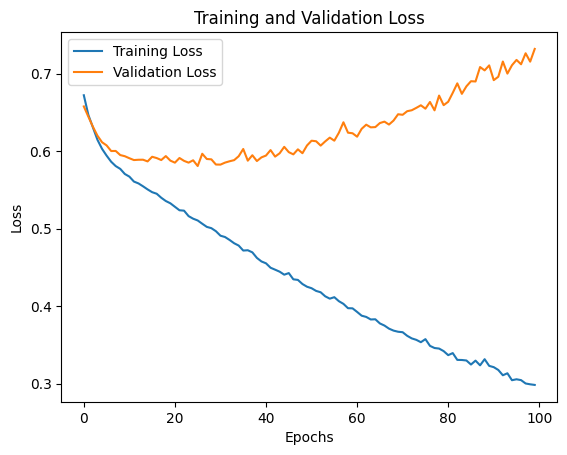

In [188]:
# Plot the Test

import matplotlib.pyplot as plt


plt.plot(vanilla_history.history['loss'], label='Training Loss')
plt.plot(vanilla_history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Model Optimizer 1 (Florent Hirwa) - L1 Regularization with RMSprop

L1 Regularization # Florent

In [189]:
# necessary imports

import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.callbacks import EarlyStopping



In [190]:
# Model architecture with L1 regularization
l1_model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1], kernel_regularizer=l1(0.001)),  # L1 regularization
    Dense(32, activation='relu', kernel_regularizer=l1(0.001)),
    Dense(1, activation='sigmoid')  # softmax for classification
])

In [191]:
# Compile model with RMSProp optimizer
l1_model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001),
              loss='binary_crossentropy',  # Adjustable
              metrics=['accuracy'])


In [192]:
# Early stopping based on validation loss
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Early stopping
l1_history = l1_model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=100,
                    batch_size=32,
                    callbacks=[early_stopping],
                    verbose=0)

In [193]:
# Model performance on the validation data
#l1_val_loss, l1_val_accuracy = l1_model.evaluate(val_dataset)
l1_val_loss, l1_val_accuracy = l1_model.evaluate(X_test, y_test)
print(f"Validation Loss: {l1_val_loss}, Validation Accuracy: {l1_val_accuracy}")

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6968 - loss: 0.6948 
Validation Loss: 0.6996935606002808, Validation Accuracy: 0.6844512224197388


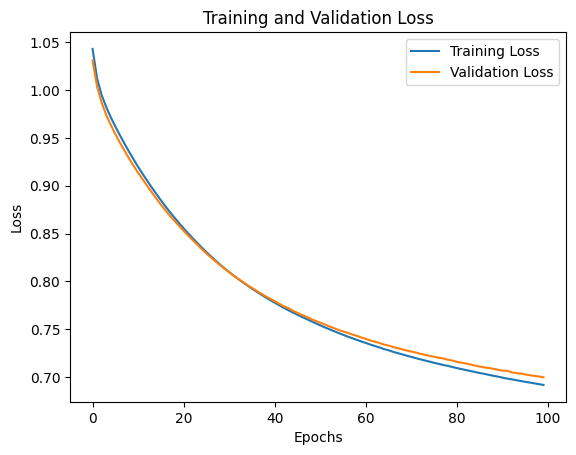

In [194]:
# Plot Test

import matplotlib.pyplot as plt


plt.plot(l1_history.history['loss'], label='Training Loss')
plt.plot(l1_history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Model Optimizer 2 (Maxime Bakunzi) - L2 Regularization with Adam


In [195]:
# Import necessary libraries

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [196]:

input_dim = X_train.shape[1]
# Create L2 regularized model
l2_model = Sequential([
    Dense(64, activation='relu', input_dim=input_dim, kernel_regularizer=l2(0.01)),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(1, activation='sigmoid')
])


In [197]:
# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Compile and train L2 regularized model
l2_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

l2_history = l2_model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=0
)

In [198]:
# Evaluate L2 regularized model
l2_val_loss, l2_val_accuracy = l2_model.evaluate(X_test, y_test)
print(f"L2 Regularized Model - Test(Validation) Loss: {l2_val_loss:.4f}, Test(validation) Accuracy: {l2_val_accuracy:.4f}")


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6797 - loss: 0.6205 
L2 Regularized Model - Test(Validation) Loss: 0.6203, Test(validation) Accuracy: 0.6677


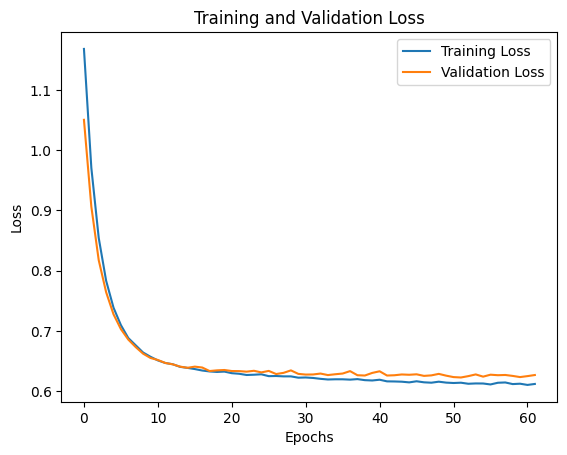

In [199]:
# Plotting Test
import matplotlib.pyplot as plt


plt.plot(l2_history.history['loss'], label='Training Loss')
plt.plot(l2_history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# **Error Analysis**

In [200]:
# import numpy
import numpy as np

# Predict for Vanilla model
Y_pred_vanilla = vanilla_model.predict(X_test)
Y_pred_vanilla = np.round(Y_pred_vanilla)

# Predict for L1 model
Y_pred_l1 = l1_model.predict(X_test)
Y_pred_l1 = np.round(Y_pred_l1)

# Predict for L2 model
Y_pred_l2 = l2_model.predict(X_test)
Y_pred_l2 = np.round(Y_pred_l2)

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


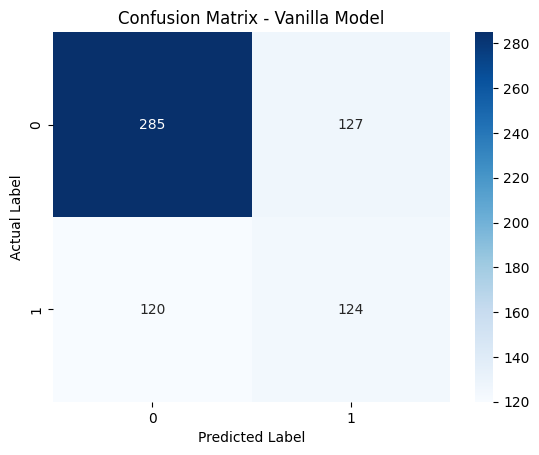

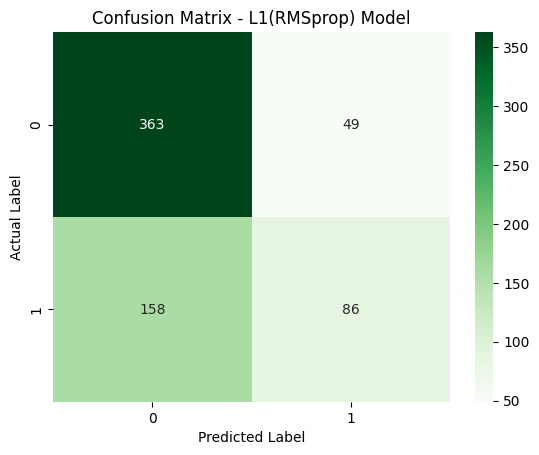

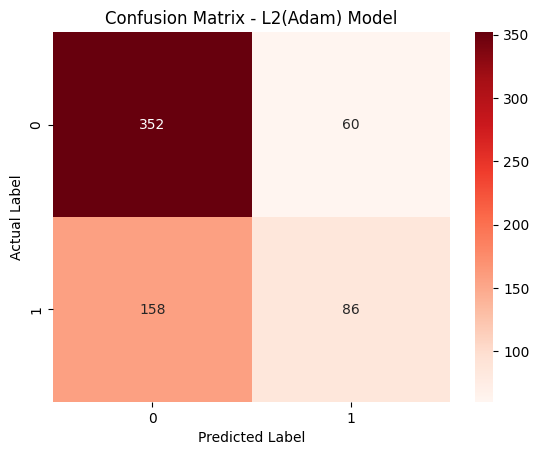

In [201]:

# Import necessary libraries and methods
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns

# Confusion Matrix - Vanilla Model
vanilla_conf_matrix = confusion_matrix(y_test, Y_pred_vanilla)
sns.heatmap(vanilla_conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix - Vanilla Model')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Confusion Matrix - L1(RMSprop) Model
l1_conf_matrix = confusion_matrix(y_test, Y_pred_l1)
sns.heatmap(l1_conf_matrix, annot=True, fmt="d", cmap="Greens")
plt.title('Confusion Matrix - L1(RMSprop) Model')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Confusion Matrix - L2(Adam) Model
l2_conf_matrix = confusion_matrix(y_test, Y_pred_l2)
sns.heatmap(l2_conf_matrix, annot=True, fmt="d", cmap="Reds")
plt.title('Confusion Matrix - L2(Adam) Model')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [202]:
# Precision, Recall (Sensitivity), F1 Score for Vanilla Model
vanilla_precision = precision_score(y_test, Y_pred_vanilla)
vanilla_recall = recall_score(y_test, Y_pred_vanilla)  # Sensitivity
vanilla_f1 = f1_score(y_test, Y_pred_vanilla)

# Precision, Recall (Sensitivity), F1 Score for L1(RMSprop) Model
l1_precision = precision_score(y_test, Y_pred_l1)
l1_recall = recall_score(y_test, Y_pred_l1)  # Sensitivity
l1_f1 = f1_score(y_test, Y_pred_l1)

# Precision, Recall (Sensitivity), F1 Score for L2(Adam) Model
l2_precision = precision_score(y_test, Y_pred_l2)
l2_recall = recall_score(y_test, Y_pred_l2)  # Sensitivity
l2_f1 = f1_score(y_test, Y_pred_l2)

In [203]:
# Specificity = TN / (TN + FP) - Vanilla Model
tn, fp, fn, tp = vanilla_conf_matrix.ravel()
vanilla_specificity = tn / (tn + fp)

# Specificity = TN / (TN + FP) - L1 Model
tn, fp, fn, tp = l1_conf_matrix.ravel()
l1_specificity = tn / (tn + fp)

# Specificity = TN / (TN + FP) - L2 Model
tn, fp, fn, tp = l2_conf_matrix.ravel()
l2_specificity = tn / (tn + fp)

In [204]:
# Printing results for Vanilla Model

print(f"Error Analysis - Vanilla Model:")
print(f"Vanilla Precision: {vanilla_precision:.4f}")
print(f"Vanilla Recall (Sensitivity): {vanilla_recall:.4f}")
print(f"Vanilla Specificity: {vanilla_specificity:.4f}")
print(f"Vanilla F1 Score: {vanilla_f1:.4f}")

# Printing results for L1(RMSprop)
print(f"\nError Analysis - L1(RMSprop) Model:")
print(f"L1 Precision: {l1_precision:.4f}")
print(f"L1 Recall (Sensitivity): {l1_recall:.4f}")
print(f"L1 Specificity: {l1_specificity:.4f}")
print(f"L1 F1 Score: {l1_f1:.4f}")

# Printing results for L2(Adam)
print(f"\nError Analysis - L2(Adam) Model:")
print(f"L2 Precision: {l2_precision:.4f}")
print(f"L2 Recall (Sensitivity): {l2_recall:.4f}")
print(f"L2 Specificity: {l2_specificity:.4f}")
print(f"L2 F1 Score: {l2_f1:.4f}")

Error Analysis - Vanilla Model:
Vanilla Precision: 0.4940
Vanilla Recall (Sensitivity): 0.5082
Vanilla Specificity: 0.6917
Vanilla F1 Score: 0.5010

Error Analysis - L1(RMSprop) Model:
L1 Precision: 0.6370
L1 Recall (Sensitivity): 0.3525
L1 Specificity: 0.8811
L1 F1 Score: 0.4538

Error Analysis - L2(Adam) Model:
L2 Precision: 0.5890
L2 Recall (Sensitivity): 0.3525
L2 Specificity: 0.8544
L2 F1 Score: 0.4410


# **Plotting Results**


Plotting Results


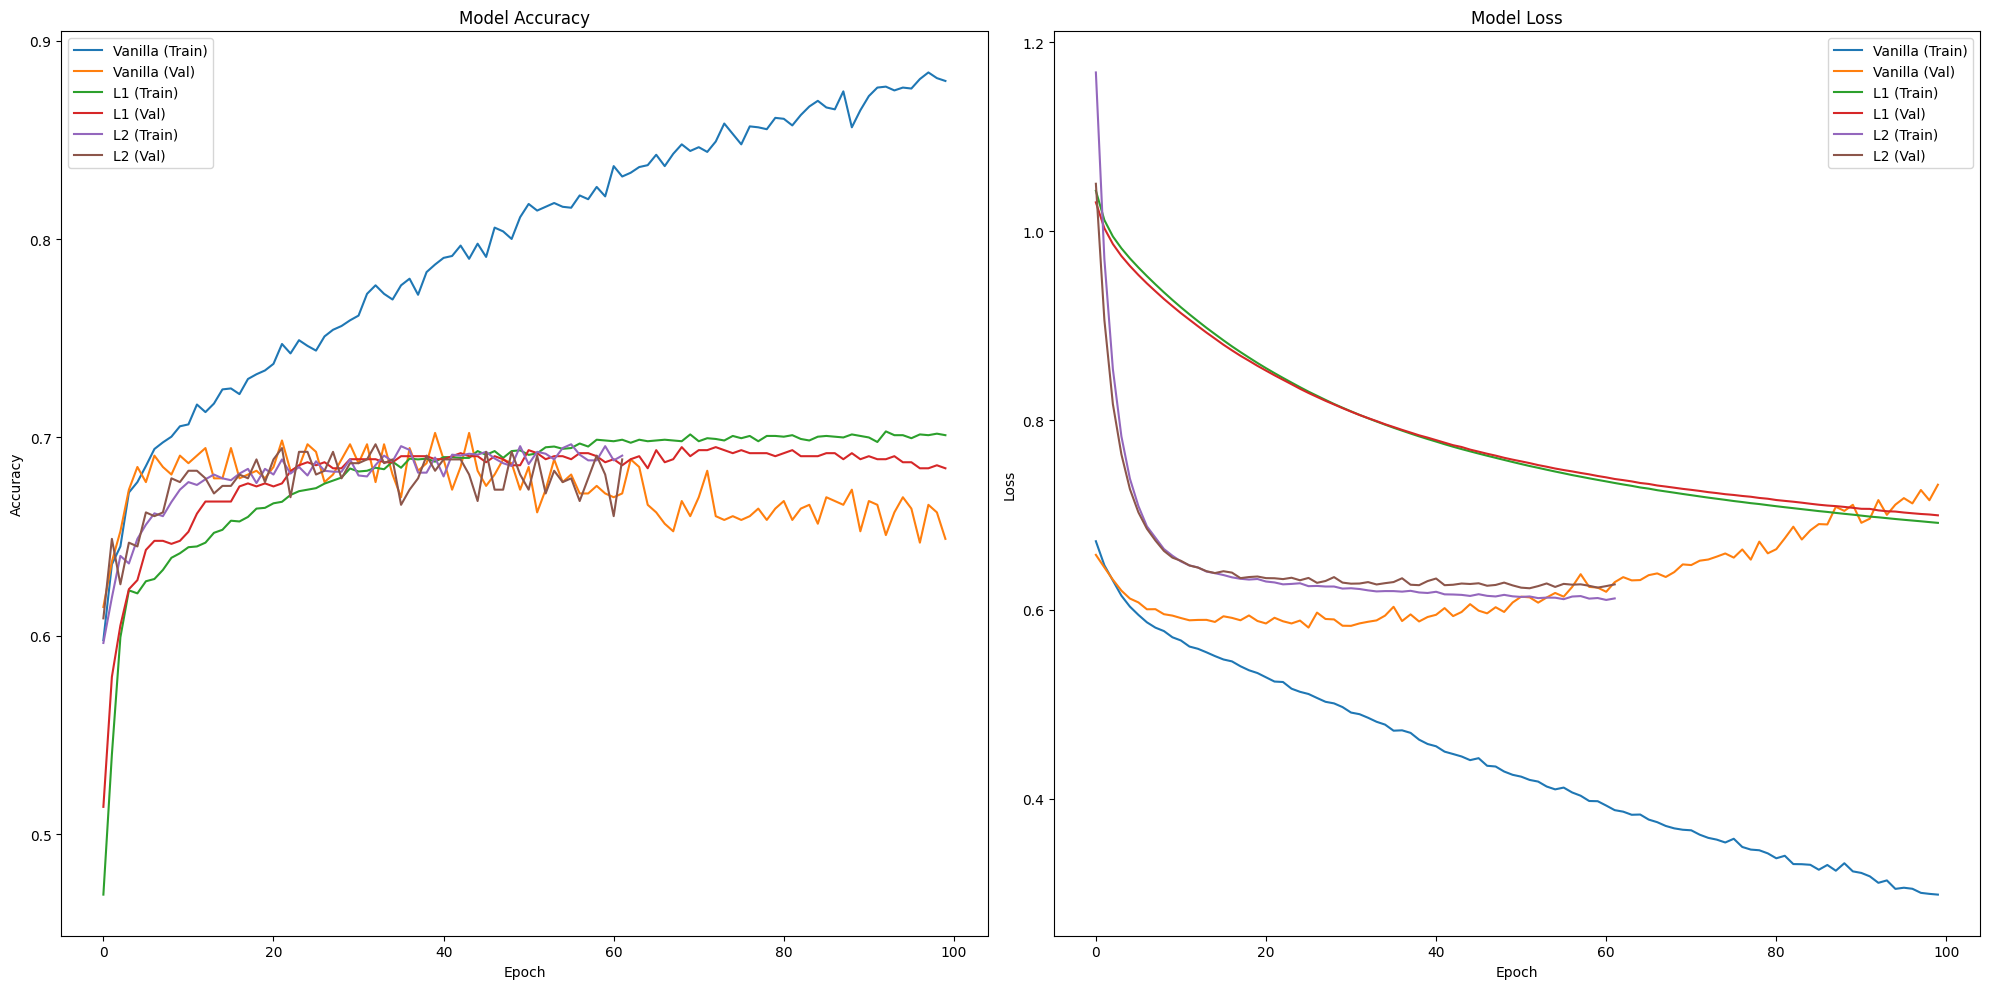

In [205]:
print("\nPlotting Results")

plt.figure(figsize=(20, 10))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(vanilla_history.history['accuracy'], label='Vanilla (Train)')
plt.plot(vanilla_history.history['val_accuracy'], label='Vanilla (Val)')
plt.plot(l1_history.history['accuracy'], label='L1 (Train)')
plt.plot(l1_history.history['val_accuracy'], label='L1 (Val)')
plt.plot(l2_history.history['accuracy'], label='L2 (Train)')
plt.plot(l2_history.history['val_accuracy'], label='L2 (Val)')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(vanilla_history.history['loss'], label='Vanilla (Train)')
plt.plot(vanilla_history.history['val_loss'], label='Vanilla (Val)')
plt.plot(l1_history.history['loss'], label='L1 (Train)')
plt.plot(l1_history.history['val_loss'], label='L1 (Val)')
plt.plot(l2_history.history['loss'], label='L2 (Train)')
plt.plot(l2_history.history['val_loss'], label='L2 (Val)')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

# **Model Observation**

In [206]:
print("\nFinal Test Accuracies:")
print(f"Vanilla Model: {vanilla_accuracy:.4f}")
print(f"L1 Regularized Model: {l1_val_accuracy:.4f}")
print(f"L2 Regularized Model: {l2_val_accuracy:.4f}")


Final Test Accuracies:
Vanilla Model: 0.6235
L1 Regularized Model: 0.6845
L2 Regularized Model: 0.6677
